In [1]:
import sys
sys.path.append('../../')

import estraces
import scared
from kresca.plot import CurvePlot
from kresca.reverse import LeakageAssessment

## Import Traces

In [2]:
ths = estraces.read_ths_from_ets_file('../../Traces/AES_CW_5k.ets')

In [3]:
print(ths)

Trace Header Set:
Name.............: ETS Format THS
Reader...........: ETS format reader of file ../../Traces/AES_CW_5k.ets with 5000 traces.
key..............: uint8
plaintext........: uint8



## Plot Traces

RFBOutputContext()

CanvasBackend(css_height='500px', css_width='950px')
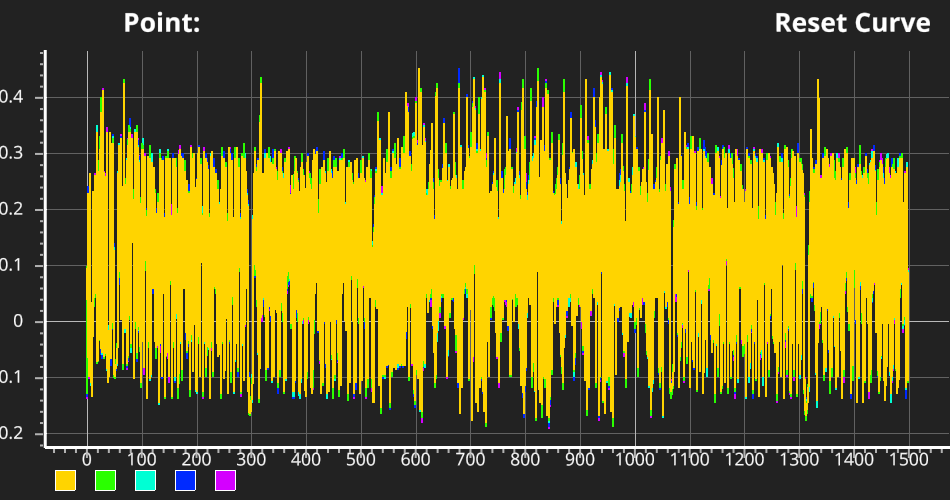

In [4]:
#put inline=True if you want to display on notebook
CurvePlot(ths.samples[:5], inline=True) 

## Make Selection Funtions

In [5]:
@scared.reverse_selection_function
def plaintext(plaintext):
    return plaintext

@scared.reverse_selection_function
def first_addroundkey(plaintext, key):
    return scared.aes.encrypt(plaintext, key, at_round=0, after_step=scared.aes.Steps.ADD_ROUND_KEY)

@scared.reverse_selection_function
def first_subbytes(plaintext, key):
    return scared.aes.encrypt(plaintext, key, at_round=1, after_step=scared.aes.Steps.SUB_BYTES)

@scared.reverse_selection_function
def last_addroundkey(ciphertext, key):
    return scared.aes.decrypt(ciphertext, key, at_round=0, after_step=scared.aes.Steps.ADD_ROUND_KEY)

@scared.reverse_selection_function
def last_subbytes(ciphertext, key):
    return scared.aes.decrypt(ciphertext, key, at_round=1, after_step=scared.aes.Steps.SUB_BYTES)

@scared.reverse_selection_function
def ciphertext(ciphertext):
    return ciphertext

In [6]:
AES_selection_functions = {
    'AES Plaintext': plaintext,
    'AES First Add Round Key': first_addroundkey,
    'AES First Sub Bytes': first_subbytes,
#     'AES Last Add Round Key': last_addroundkey,
#     'AES Last Sub Bytes': last_subbytes,
#     'AES Ciphertext': ciphertext,
}

## Make Leakage Assessment Object

In [7]:
reverse = LeakageAssessment(
    ths=ths,
    selection_functions=AES_selection_functions
)

In [8]:
reverse.run()

selection_function: AES Plaintext


  0%|          | 0/1 [00:00<?, ?it/s]

selection_function: AES First Add Round Key


  0%|          | 0/1 [00:00<?, ?it/s]

selection_function: AES First Sub Bytes


  0%|          | 0/1 [00:00<?, ?it/s]

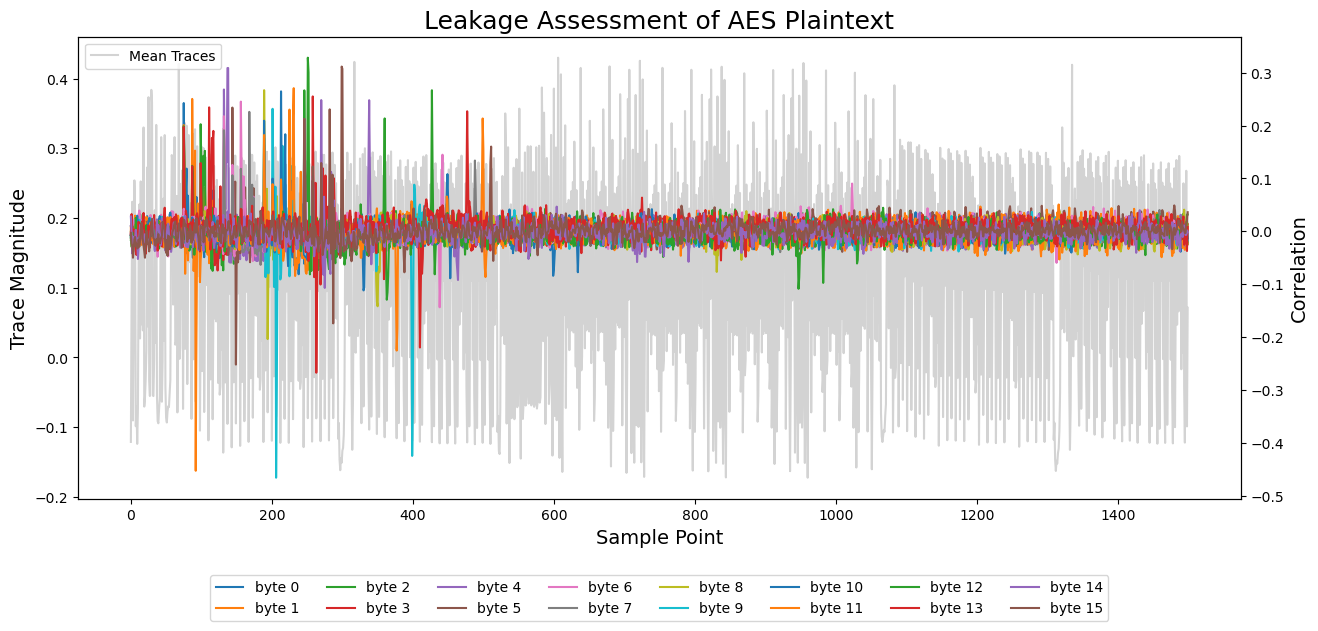

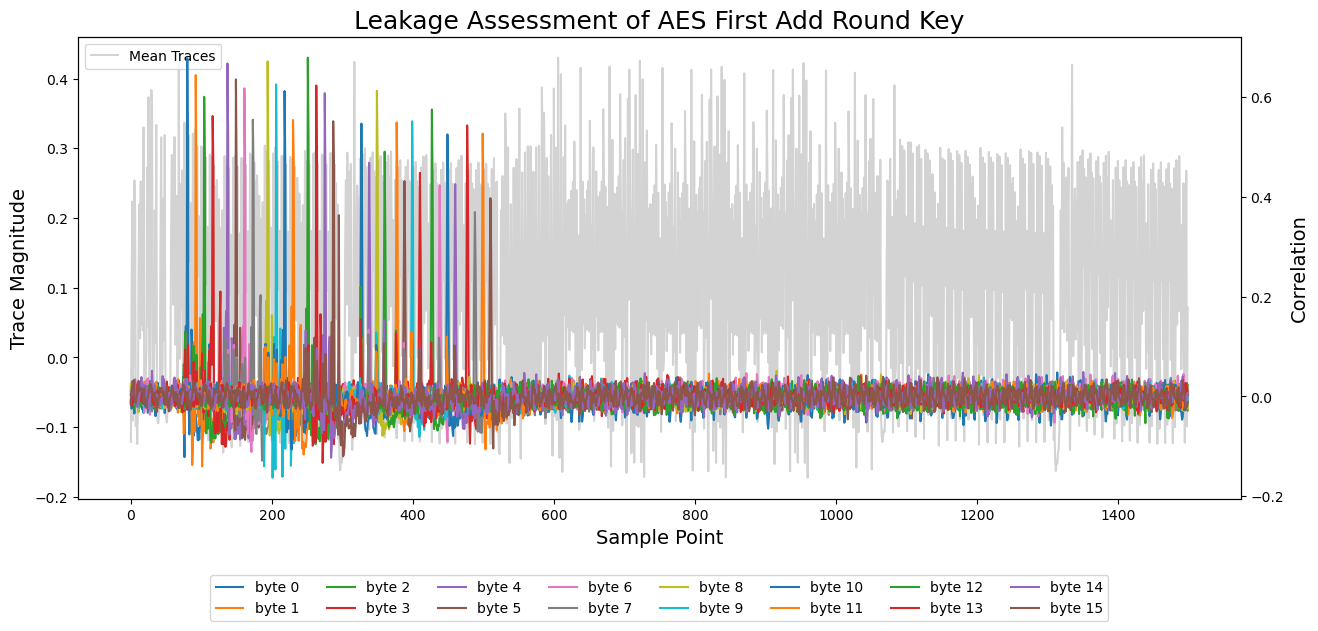

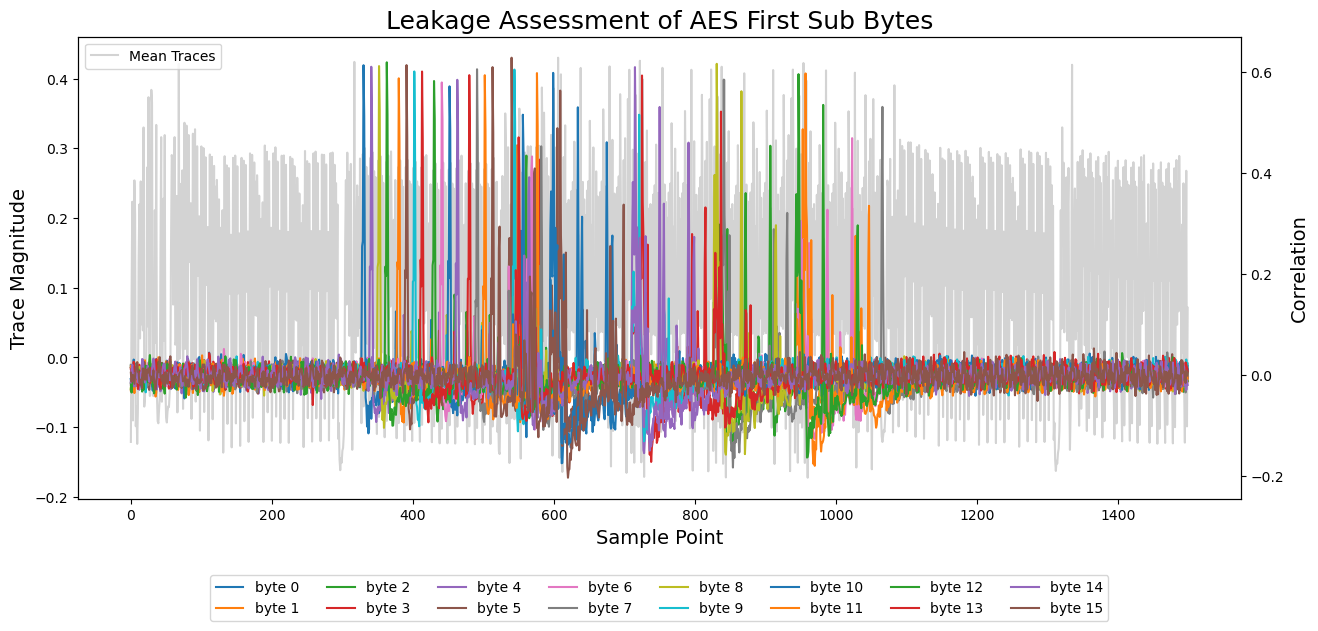

In [9]:
reverse.show_result()